In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation
import tensorflow as tf 

Using TensorFlow backend.


In [2]:
NUM_CLASSES = 10
IMG_ROWS = IMG_COLS = 28

# test ve egitim icin verileri otomatik cikartiliyor
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# egitim icin kullanilacak inputlarin boyutu degistirildi, xtrain=array, 1 tane kanal rayisi var siyahbeyaz. rgbde 3 kanal var
X_train = X_train.reshape(X_train.shape[0], IMG_ROWS, IMG_COLS, 1) 
X_test = X_test.reshape(X_test.shape[0], IMG_ROWS, IMG_COLS, 1)

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

#y_train i matrixe cevir -> one_hot'in karsiligi
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES) 
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

In [3]:
model = Sequential()

#resimlere aktivasyon yapmak zorundayiz cunku ozniteliklerin degerleri cok artiyor, degersizler azaliyor. 
# aktivasyondan gecirip degersizleri sifirlayarak onlardan kurtulmaya calisiliyor (negatif degerer sifir olsun).
# 32 tane farkli filtre uygula
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(IMG_ROWS, IMG_COLS,1))) 

# 2x2 pizelleri geziyor, en buyugunu aliyor. gereksiz bilgileri atip boyut dusuruluyor
model.add(MaxPool2D(pool_size=(2, 2))) 

model.add(Conv2D(64, kernel_size=(5, 5), activation='relu')) 
model.add(MaxPool2D(pool_size=(2, 2)))

#model.add(Dropout(0.35))

 # duz katman
model.add(Flatten())

 # dense=hiddenlayer=fullconnected. 1 gizli katmanda 128 noron var. gizli katman eklemek icin tekrar ayni sekilde add
model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASSES))

# model.add(Dense(NUM_CLASSES, activation='softmax')) #exit layer
# normally it is better to use the code line above but because of 
# dependency problems in the current environment, I used the code line below
model.add(Activation(tf.nn.softmax))

model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adam(), 
              metrics=['accuracy'])

In [4]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 263s 4ms/step - loss: 0.1984 - acc: 0.9416 - val_loss: 0.0479 - val_acc: 0.9835
Epoch 2/10
60000/60000 [==============================] - 358s 6ms/step - loss: 0.0518 - acc: 0.9841 - val_loss: 0.0345 - val_acc: 0.9893
Epoch 3/10
60000/60000 [==============================] - 363s 6ms/step - loss: 0.0360 - acc: 0.9888 - val_loss: 0.0278 - val_acc: 0.9913
Epoch 4/10
60000/60000 [==============================] - 327s 5ms/step - loss: 0.0273 - acc: 0.9913 - val_loss: 0.0312 - val_acc: 0.9899
Epoch 5/10
60000/60000 [==============================] - 337s 6ms/step - loss: 0.0212 - acc: 0.9932 - val_loss: 0.0258 - val_acc: 0.9913
Epoch 6/10
60000/60000 [==============================] - 291s 5ms/step - loss: 0.0161 - acc: 0.9946 - val_loss: 0.0243 - val_acc: 0.9921
Epoch 7/10
60000/60000 [==============================] - 227s 4ms/step - loss: 0.0145 - acc: 0.9952 - val_loss: 0.0221 - 

In [5]:
model.evaluate(X_test, y_test, verbose=1)

10000/10000 [==============================] - 25s 3ms/step


[0.03565424863046028, 0.9902]

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

def show_digit(pixels):
    img = pixels.reshape(28, 28)
    plt.axis('off')
    plt.imshow(img, cmap='gray_r')

Probability of being 0: 0.000000%
Probability of being 1: 0.000000%
Probability of being 2: 0.000000%
Probability of being 3: 100.000000%
Probability of being 4: 0.000000%
Probability of being 5: 0.000000%
Probability of being 6: 0.000000%
Probability of being 7: 0.000000%
Probability of being 8: 0.000000%
Probability of being 9: 0.000000%


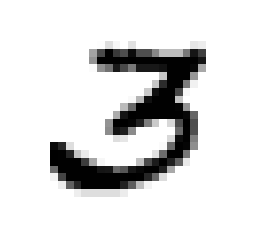

In [26]:
sample = random.choice(X_test)

show_digit(sample)

sample = sample.reshape(1, 28, 28, 1)

predictions = model.predict(sample)[0]

for i, v in enumerate(predictions):
    print("Probability of being %d: %.6f%%" % (i, v * 100))